In [18]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt
import matplotlib.dates as mdates
import math
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error, mean_absolute_error # Add mean_absolute_error here
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

warnings.filterwarnings('ignore')

# Set style seaborn
sns.set_style("whitegrid")

In [19]:
#Import Dataset
data = pd.read_csv('Stock_Dataset')
data.head()

,Date,Last Price,Opening Price,High Price,Low Price,Volume,Change (%)
0,2020-01-03,15.55,15.55,15.55,15.55,10000.0,-2.20
1,2020-01-07,15.55,15.55,15.55,15.55,100000.0,0.00
2,2020-01-08,15.55,15.55,15.55,15.55,20000.0,0.00
3,2020-01-09,15.55,15.55,15.55,15.55,10000.0,0.00
4,2020-01-10,15.75,15.55,15.75,15.55,120000.0,1.29


In [20]:
#Check Number of row and missing values
print('Number of rows and columns', data.shape)
print('Number of missing values', data.isnull().sum())

Number of rows and columns (1081, 7)
Number of missing values Date               0
Last Price         0
Opening Price      0
High Price         0
Low Price          0
Volume           102
Change (%)         0
dtype: int64


In [21]:
#Fixing the missing values
data.fillna(0, inplace=True)
data.isnull().sum()

,0
Date,0
Last Price,0
Opening Price,0
High Price,0
Low Price,0
Volume,0
Change (%),0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081 entries, 0 to 1080
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1081 non-null   object 
 1   Last Price     1081 non-null   float64
 2   Opening Price  1081 non-null   float64
 3   High Price     1081 non-null   float64
 4   Low Price      1081 non-null   float64
 5   Volume         1081 non-null   float64
 6   Change (%)     1081 non-null   float64
dtypes: float64(6), object(1)
memory usage: 59.2+ KB


In [23]:
#Convert Date type column to datetime
data['Date'] = pd.to_datetime(data['Date'])

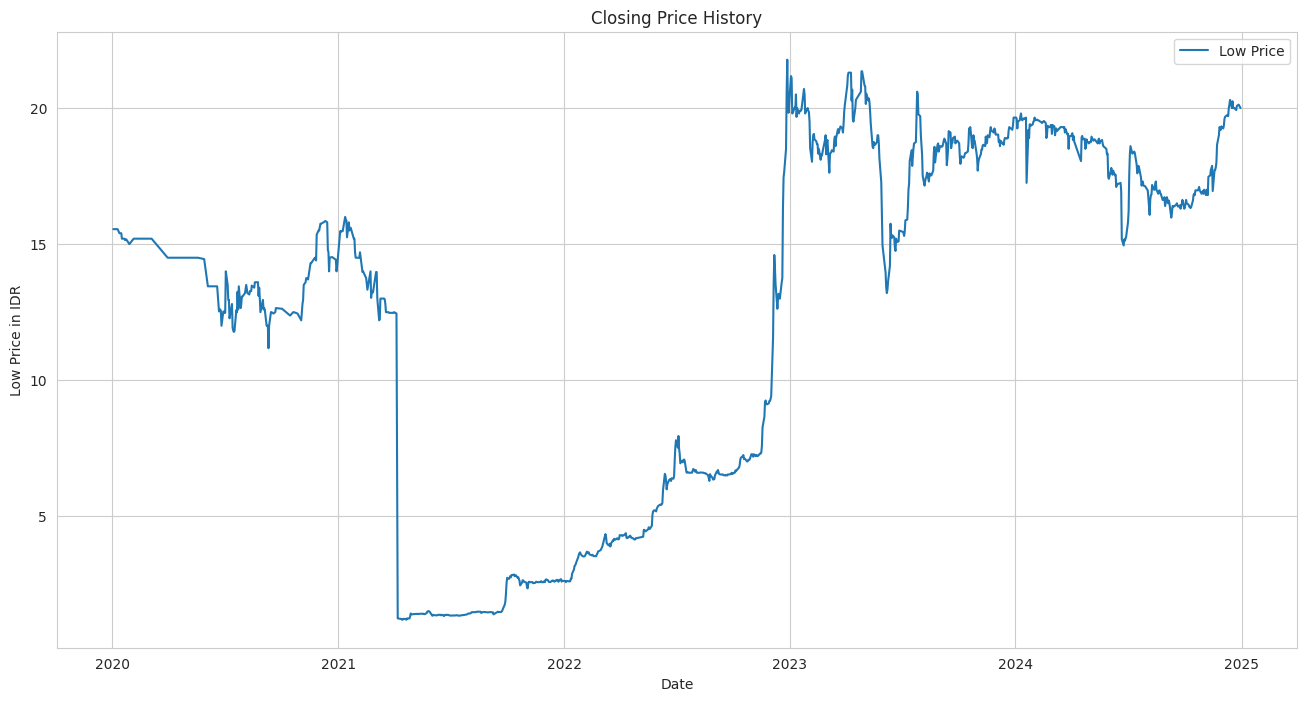

In [24]:
# Create a figure with a defined size
plt.figure(figsize=(16, 8))

# Set the title for the plot
plt.title("Closing Price History")

# Plot Date vs Low Price
plt.plot(data['Date'], data['Low Price'], label="Low Price")

# Set labels for the x and y axes
plt.xlabel("Date")
plt.ylabel("Low Price in IDR")

# Format the x-axis to display years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Display the legend
plt.legend()
plt.show()

In [25]:
#Find max and min value in 'Close' Column
data['Low Price'].max(), data['Low Price'].min()

(21.775, 1.2)

In [35]:
# Import necessary libraries
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler

# Create a DataFrame with only the Close Stock Price column (Target Variable)
data_target = data[['Low Price']]

# Convert the DataFrame to a NumPy array for training the LSTM model
target = data_target.values

# Split the dataset into training and test sets (80% training, 20% testing)
training_data_len = math.ceil(len(target) * 0.80)

# Normalize the data before model training using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
training_scaled_data = scaler.fit_transform(target)

In [27]:
# Create the training dataset using the last 60-day closing prices
# to predict the 61st closing price.

train_data = training_scaled_data[:training_data_len, :]

X_train = []  # Features: Sequences of past 60 days
y_train = []  # Target: 61st day's closing price

# Loop through the training data to create sequences
for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])  # Past 60 days as input
    y_train.append(train_data[i, 0])  # 61st day as target

# Convert to NumPy arrays for LSTM model training
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape X_train to fit LSTM input requirements (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Display the shape of the training data
print('Training dataset shape:', X_train.shape)

Training dataset shape: (805, 60, 1)


In [28]:
# Initialize the LSTM model
model = Sequential()

# Add LSTM layers with Dropout regularization
for i in range(3):
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1) if i == 0 else None))
    model.add(Dropout(0.2))

# Final LSTM layer (without return_sequences)
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - loss: 0.1606
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - loss: 0.0159
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - loss: 0.0167
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - loss: 0.0146
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - loss: 0.0107
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 147ms/step - loss: 0.0082
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - loss: 0.0079
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 168ms/step - loss: 0.0092
Epoch 9/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0074
Epoch 10/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 0.0088


In [29]:
# Prepare the test dataset, ensuring the last 60 days of training data are included
test_data = training_scaled_data[training_data_len - 60:, :]

# Create X_test and y_test datasets
X_test = [test_data[i - 60:i, 0] for i in range(60, len(test_data))]
y_test = target[training_data_len:, :]

# Convert X_test to a NumPy array
X_test = np.array(X_test)

# Reshape X_test to match LSTM input requirements
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Display the shape of the test dataset
print('Test dataset shape:', X_test.shape)

Test dataset shape: (216, 60, 1)


In [30]:
# Make predictions using the trained LSTM model
y_pred = model.predict(X_test)

# Inverse transform to get actual stock prices
predicted_stock_price = scaler.inverse_transform(y_pred)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 223ms/step


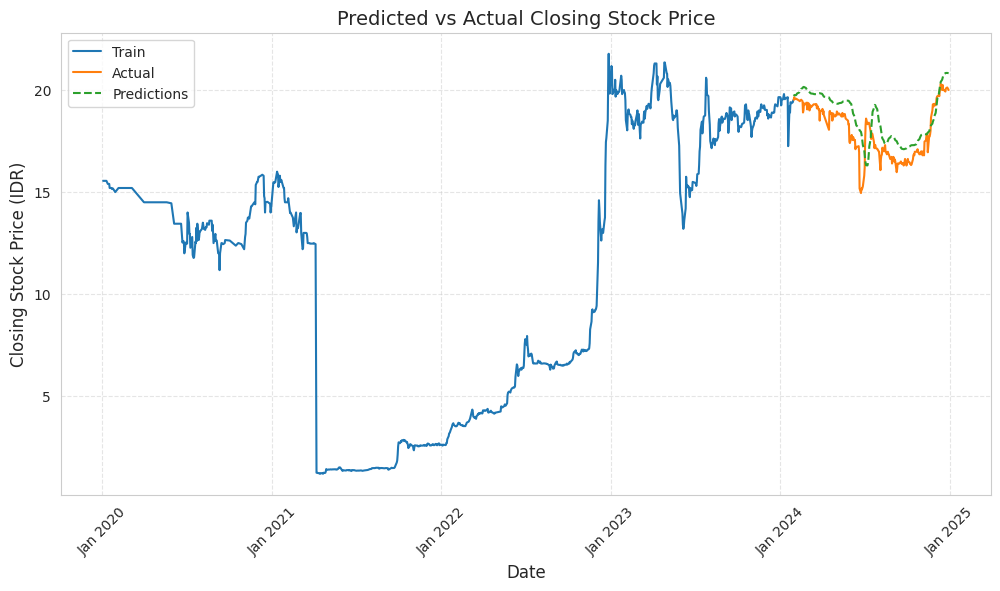

In [31]:
# Create training and validation sets for visualization
train = data_target.iloc[:training_data_len]
valid = data_target.iloc[training_data_len:].copy()
valid['Predictions'] = predicted_stock_price

# Extract corresponding dates
train_dates = data['Date'].iloc[:training_data_len]
valid_dates = data['Date'].iloc[training_data_len:]

# Plot the results
plt.figure(figsize=(12, 6))
plt.title('Predicted vs Actual Closing Stock Price', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Stock Price (IDR)', fontsize=12)

# Plot actual and predicted prices
plt.plot(train_dates, train['Low Price'], label='Train')
plt.plot(valid_dates, valid['Low Price'], label='Actual')
plt.plot(valid_dates, valid['Predictions'], label='Predictions', linestyle='dashed')

# Format the x-axis for better readability
plt.xticks(rotation=45)  # Rotate date labels
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Auto adjust date ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as 'Month Year'

plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)  # Add a subtle grid for better readability

# Save the plot
plt.savefig('predicted_stock_price.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [32]:
def compute_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

y_test = np.squeeze(y_test)

# Compute MAPE
mape = compute_mape(y_test, predicted_stock_price)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 8.66922399424155


In [33]:
def compute_mape(actual, predicted):
    """Compute Mean Absolute Percentage Error (MAPE)."""
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Ensure y_test is a 1D array
y_test = np.squeeze(y_test)

# Compute error metrics
mape = compute_mape(y_test, predicted_stock_price)
mse = mean_squared_error(y_test, predicted_stock_price)
mae = mean_absolute_error(y_test, predicted_stock_price)

# Display results
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Absolute Percentage Error (MAPE): 8.67%
Mean Squared Error (MSE): 1.0395
Mean Absolute Error (MAE): 0.8608


In [36]:
# Assuming you want to predict for the next 7 days (1 week)
next_week_data = training_scaled_data[-60:]  # Last 60 days as input for next week
next_week_data = next_week_data.reshape(1, 60, 1)  # Reshape for LSTM

next_week_predictions = model.predict(next_week_data)  # Get predictions

# Use the same scaler object (named 'scaler') to inverse transform:
predicted_prices = scaler.inverse_transform(next_week_predictions)

# Display the first few predicted values
print("Denormalized Predicted Prices:\n", predicted_prices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Denormalized Predicted Prices:
 [[20.807695]]


In [37]:
# Create a DataFrame with Dates, Actual Prices (Validation), and Predictions
results_df = pd.DataFrame({
    'Date': data['Date'][training_data_len:],  # Extract dates from original dataset
    'Actual Price': data_target[training_data_len:].values.flatten(),  # Actual validation values
    'Predicted Price': predicted_stock_price.flatten()  # Model's predicted values
})

# Display the first few rows
print(results_df.head())

# Optionally, save the results as a CSV file
results_df.to_csv("stock_predictions.csv", index=False)

          Date  Actual Price  Predicted Price
865 2024-01-31        19.525        19.783844
866 2024-02-01        19.650        19.747906
867 2024-02-02        19.550        19.736639
868 2024-02-05        19.575        19.748457
869 2024-02-06        19.550        19.779926


In [39]:
# Define the number of days to predict
num_days_to_predict = 30

# Initialize an array to store predictions
predicted_prices = []

# Get the last 60 days of data as the initial input
current_data = training_scaled_data[-60:]

# Loop to perform iterative predictions
for _ in range(num_days_to_predict):
    # Reshape the input data for LSTM
    current_data = current_data.reshape(1, 60, 1)

    # Make a prediction for the next day
    next_day_prediction = model.predict(current_data)

    # Store the prediction
    predicted_prices.append(next_day_prediction[0, 0])

    # Update the input data with the latest prediction
    # This creates a rolling window for the next prediction
    current_data = np.append(current_data[:, 1:, :], next_day_prediction.reshape(1, 1, 1), axis=1)

# Inverse transform the predictions back to the original scale
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# Display the prediction results
print("Stock Price Predictions for the Next 30 Days:")
for i, price in enumerate(predicted_prices.flatten(), start=1):
    print(f"Day {i}: {price:.2f} IDR")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━